In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from funpymodeling.exploratory import freq_tbl


In [2]:
credicel=pd.read_excel("df_limpio.xlsx")
credicel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   folio               22735 non-null  int64         
 1   tag                 22735 non-null  object        
 2   folio_solicitud     22735 non-null  int64         
 3   fecha               22735 non-null  datetime64[ns]
 4   marca               22735 non-null  object        
 5   modelo              22735 non-null  object        
 6   plazo               22735 non-null  object        
 7   precio              22735 non-null  float64       
 8   enganche            22735 non-null  float64       
 9   descuento           22735 non-null  float64       
 10  semana              22735 non-null  int64         
 11  monto_financiado    22735 non-null  float64       
 12  costo_total         22735 non-null  int64         
 13  monto_accesorios    22735 non-null  float64   

**Carlos**  
Riesgo y monto financiado.

In [3]:
df=credicel.iloc[ : , [7,8,9,10,11,12,13,25,26,27,29,30,33]]
df

,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,puntos,riesgo,score_buro,porc_eng,limite_credito,edad_cliente
0,1949.0,780.0,0.0,81,1169.0,2106,0.0,0,0.00,0,40.02,5000,23.0
1,2999.0,1050.0,0.0,225,1949.0,2925,0.0,0,0.00,0,35.01,6000,60.0
2,1959.0,490.0,0.0,170,1469.0,2210,0.0,0,0.00,0,25.01,0,58.0
3,1959.0,490.0,0.0,170,1469.0,2210,0.0,0,0.00,0,25.01,7000,42.0
4,4299.0,1075.0,0.0,178,3224.0,6942,0.0,0,0.00,0,25.01,7000,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3349.0,297.0,0.0,211,3052.0,5486,0.0,10,27.40,469,8.87,10000,NaN
22731,4100.0,1209.0,0.0,200,2891.0,5200,0.0,9,19.00,502,29.49,5000,NaN
22732,4849.0,1152.0,0.0,256,3697.0,6656,0.0,11,26.65,459,23.76,4750,NaN
22733,9799.0,2799.0,0.0,386,7000.0,15054,0.0,14,-17.35,699,28.56,7000,NaN


In [4]:
filtro = df[(df["precio"] > 0)& (df["enganche"]>0)& (df["semana"]> 0)& (df["monto_financiado"]>0)& (df["costo_total"]>0)&(df["score_buro"]>0)&(df["porc_eng"]>0)& (df["limite_credito"]>0)&(df["edad_cliente"]>0)&(df["puntos"]>7)]
filtro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1836 entries, 7235 to 21182
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   precio            1836 non-null   float64
 1   enganche          1836 non-null   float64
 2   descuento         1836 non-null   float64
 3   semana            1836 non-null   int64  
 4   monto_financiado  1836 non-null   float64
 5   costo_total       1836 non-null   int64  
 6   monto_accesorios  1836 non-null   float64
 7   puntos            1836 non-null   int64  
 8   riesgo            1836 non-null   float64
 9   score_buro        1836 non-null   int64  
 10  porc_eng          1836 non-null   float64
 11  limite_credito    1836 non-null   int64  
 12  edad_cliente      1836 non-null   float64
dtypes: float64(8), int64(5)
memory usage: 200.8 KB


**ANÁLISIS DE RIESGO**  

c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


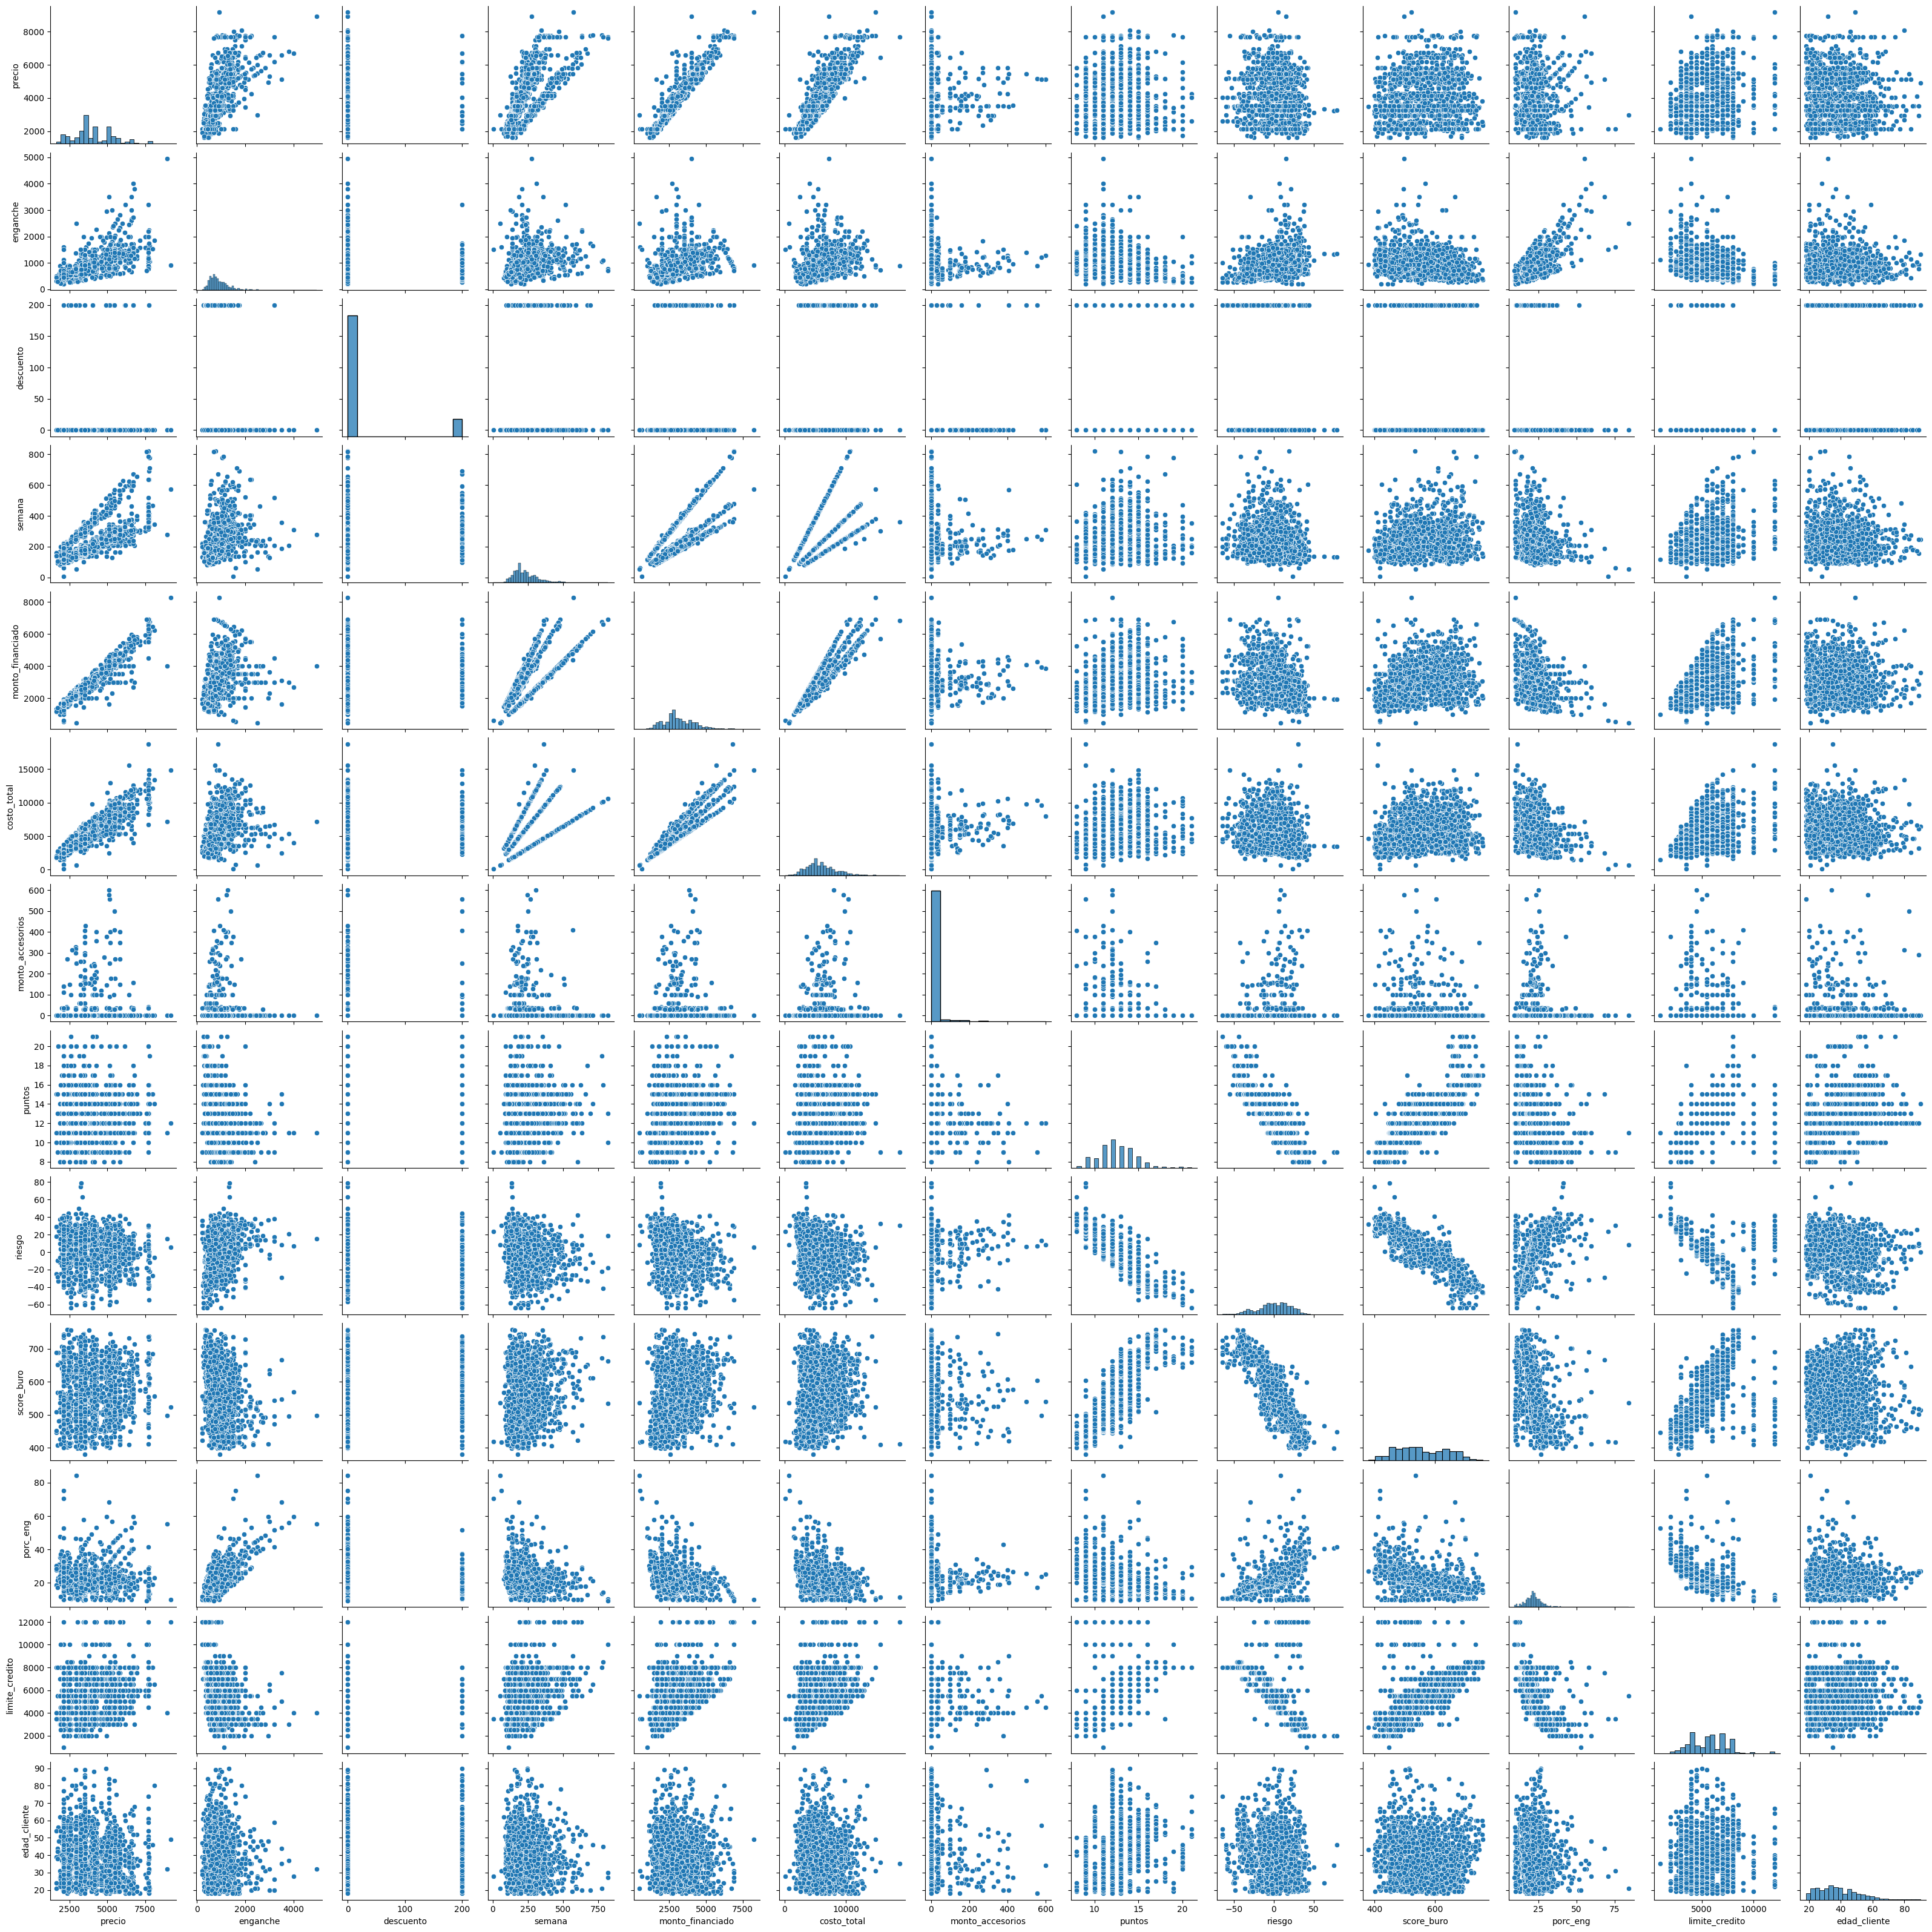

In [5]:
sns.pairplot(filtro)

In [6]:
#Declaración de variables
Var_Dep1 = filtro[["riesgo"]]
Var_Indep1 = filtro[["puntos","score_buro","enganche","limite_credito"]]

In [7]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [8]:
type=model1

In [9]:
model1.fit(X=Var_Indep1, y=Var_Dep1)

LinearRegression()

In [10]:
model1.__dict__
#Duda sobre el modelo matemático

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['puntos', 'score_buro', 'enganche', 'limite_credito'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([[-4.63472559e+00, -9.48713674e-02,  2.36533042e-03,
         -1.18189703e-03]]),
 'rank_': 4,
 'singular_': array([7.75404113e+04, 1.77893286e+04, 2.58221009e+03, 5.09470373e+01]),
 'intercept_': array([115.62405986])}

In [11]:
model1.score(Var_Indep1,Var_Dep1)

0.8703661995560452

In [12]:
riesgoDeter=model1.score(X=Var_Indep1, y=Var_Dep1)
riesgoDeter

0.8703661995560452

In [13]:
riesgoCorrel=np.sqrt(riesgoDeter)
riesgoCorrel

0.9329341882233951

**riesgo = -4.63472559e+00B1 -9.48713674e-02B2 + 2.36533042e-03B3 -1.18189703e-03B4 + 115.62405986**

c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


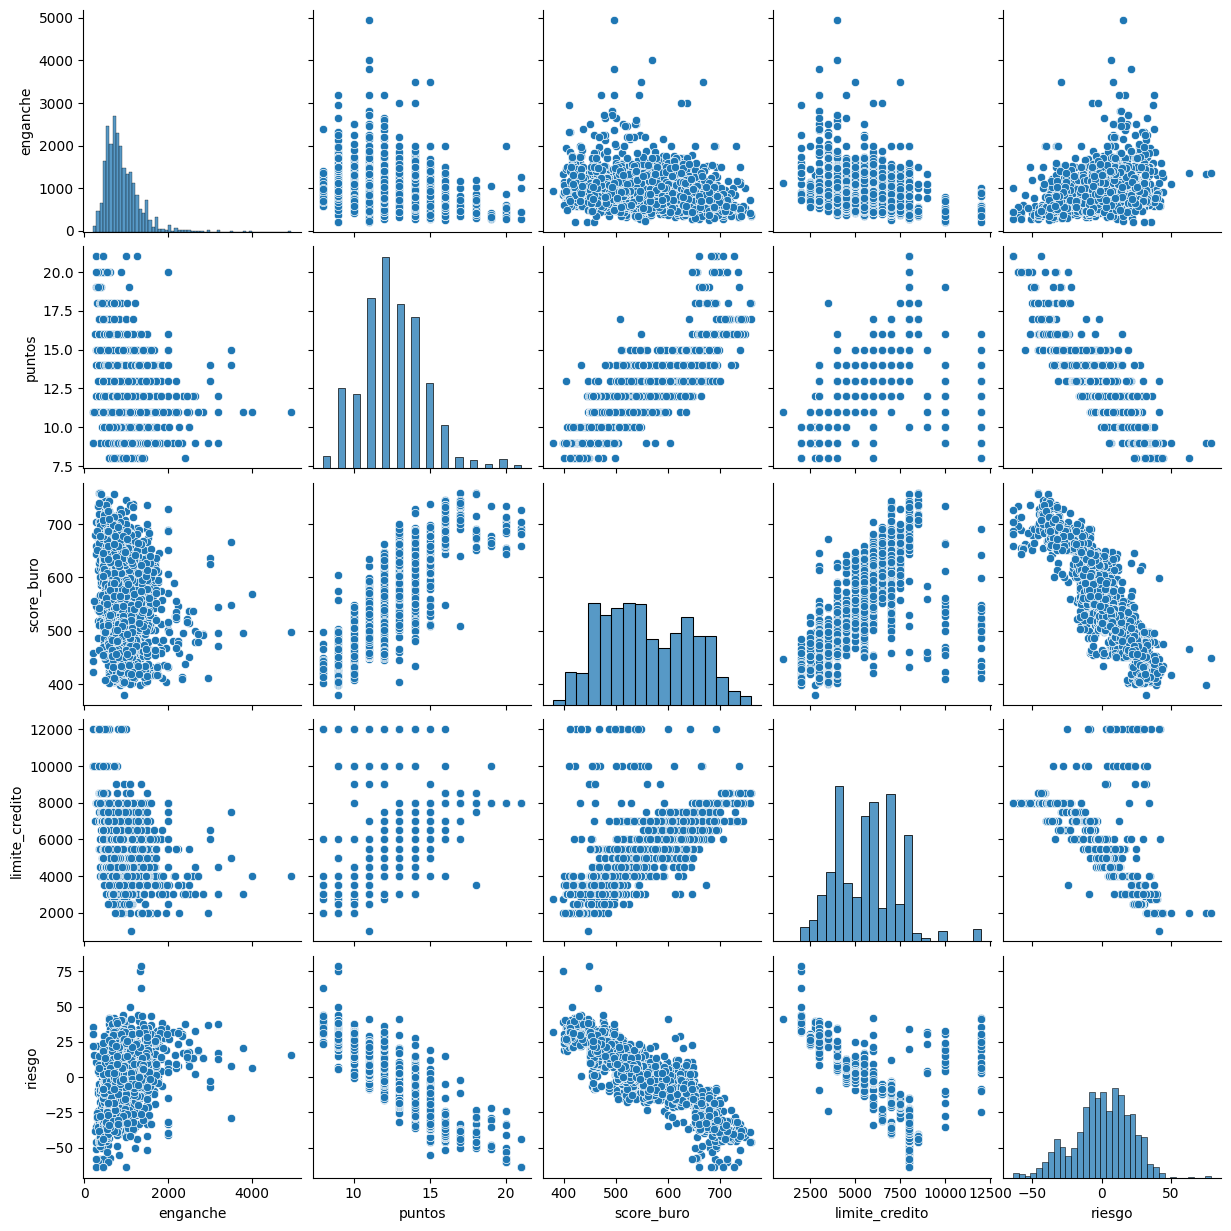

In [14]:
riesgo = filtro.iloc[ : , [1,7,9,11,8]]
sns.pairplot(riesgo)

**MONTO FINANCIADO**

In [15]:
#Declaración de variables
Var_Dep2 = filtro[["monto_financiado"]]
Var_Indep2 = filtro[["limite_credito","edad_cliente"]]

In [16]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

In [17]:
type=model2

In [18]:
model2.fit(X=Var_Indep2, y=Var_Dep2)

LinearRegression()

In [19]:
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['limite_credito', 'edad_cliente'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([[ 0.19250562, -8.39744349]]),
 'rank_': 2,
 'singular_': array([77250.83123984,   545.00951351]),
 'intercept_': array([2384.53354782])}

**monto_financiado = 0.19250562B1 - 8.39744349B2 + 2384.53354782**

In [20]:
model2.score(Var_Indep2,Var_Dep2)

0.10989587626246278

In [21]:
montoDeter=model2.score(X=Var_Indep2, y=Var_Dep2)
montoDeter

0.10989587626246278

In [22]:
montoCorrel=np.sqrt(montoDeter)
montoCorrel

0.331505469430691

c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


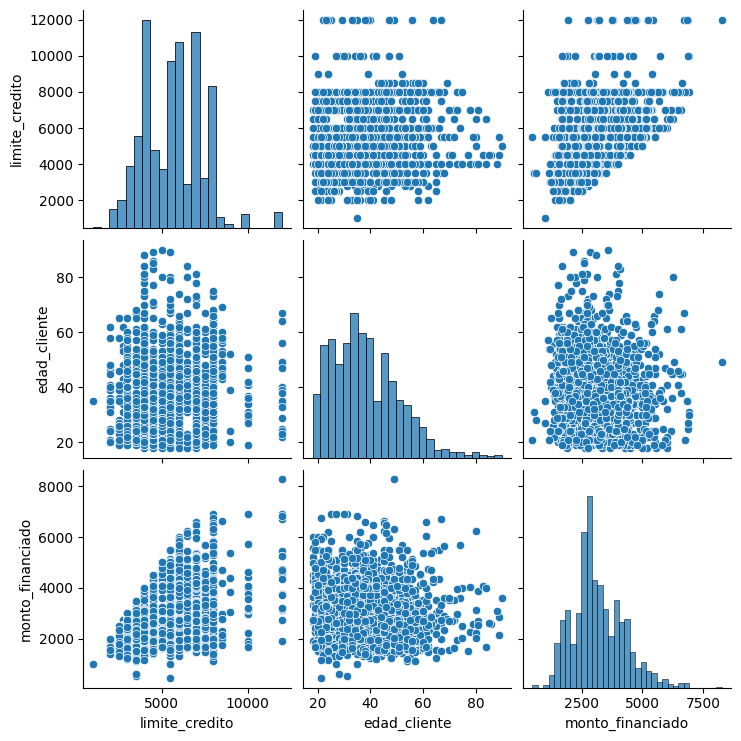

In [23]:
monto = filtro.iloc[ : , [11,12,4]]
sns.pairplot(monto)